In [2]:
#Linking to File from Desktop
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
#Read in Excel File for Analytics
BEC = pd.read_excel(r'C:\\Users\\jroberts102\\Desktop\\Python\\CPA Exam Analytics.xlsx', sheet_name='BEC')

In [4]:
#Provides user option of which exam they would like analysis completed for
#WhatExamQuestion = input("What exam would you like to see analysis for? \nEnter FAR, REG, AUD, or BEC\n")

#if WhatExamQuestion == "FAR":
#    FARInputTestType = input("For FAR, Would you like to review all three practice exam scores or just one specific practice exam? (Enter \"ALL\" for all three or 1, 2, or 3 for specific exam)\n") 
#elif WhatExamQuestion == "AUD":
 #   AUDInputTestType = input("For AUD, Would you like to review all three practice exam scores or just one specific practice exam? (Enter \"ALL\" for all three or 1, 2, or 3 for specific exam)\n") 
#elif WhatExamQuestion == "BEC":
BECInputTestType = input("For BEC, Would you like to review all three practice exam scores or just one specific practice exam? (Enter \"ALL\" for all \nthree or 1, 2, or 3 for specific exam)\n") 
#elif WhatExamQuestion == "REG":
    #REGInputTestType = input("For REG, Would you like to review all three practice exam scores or just one specific practice exam? (Enter \"ALL\" for all three or 1, 2, or 3 for specific exam)\n")
#else:
    #print("This was not a valid response")

For BEC, Would you like to review all three practice exam scores or just one specific practice exam? (Enter "ALL" for all 
three or 1, 2, or 3 for specific exam)
1


In [5]:
#Allows user to input their respective CPA exam score for analysis
if BECInputTestType == "1":
    BECTest1Score = int(input("Please enter BEC Mock Exam Test 1 Score: \n"))
    ScoreAnalysisCriteria = int(input("I would like to also see score criteria for scores within __ of my score\n"))
    BECTest2Score = 0 
    BECTest3Score = 0
elif BECInputTestType == "2":
    BECTest2Score = int(input("Please enter BEC Mock Exam Test 2 Score: \n"))
    ScoreAnalysisCriteria = int(input("I would like to also see score criteria for scores within __ of my score\n"))
    BECTest1Score = 0
    BECTest3Score = 0
elif BECInputTestType == "3":
    BECTest3Score = int(input("Please enter BEC Mock Exam Test 3 Score: \n"))
    ScoreAnalysisCriteria = int(input("I would like to also see score criteria for scores within __ of my score\n"))
    BECTest1Score = 0
    BECTest2Score = 0
elif BECInputTestType == "ALL":
    BECTest1Score = int(input("Please enter BEC Mock Exam Test 1 Score: \n"))
    BECTest2Score = int(input("Please enter BEC Mock Exam Test 2 Score: \n"))
    BECTest3Score = int(input("Please enter BEC Mock Exam Test 3 Score: \n"))
    ScoreAnalysisCriteria = int(input("I would like to also see score criteria for scores within __ of my score\n"))
    BECAverage = ((BECTest1Score + BECTest2Score + BECTest3Score)/3)
else:
    print("You're buns please read the directions")

Please enter BEC Mock Exam Test 1 Score: 
60
I would like to also see score criteria for scores within __ of my score
5


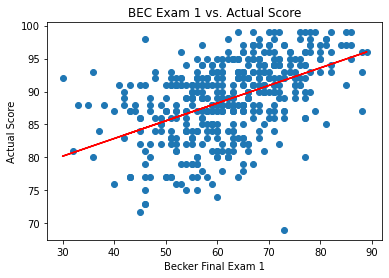



The Equation for this exam is Y = 72.13 + 0.27x
Your projected score based on all available data is 88.24
This was based on a study of 475 records


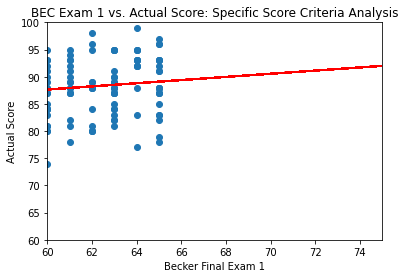



This study takes into account CPA Exam scores plus or minus the variable provided by you. This is meant to a more precise 
indicator of your actual score.
The Equation for this exam is Y = 70.23 + 0.29x
Your projected score based on the specific data subset is 87.64
This was based on a study of 193 records
Great Job, but continue to keep up the good work


In [6]:
if (BECTest1Score > 0) and BECTest2Score == 0:
    X = BEC["Becker Final Exam #1"]
    Y = BEC["Actual Score"]
    M, B = np.polyfit(X, Y, 1)

    plt.scatter(X,Y)
    plt.title("BEC Exam 1 vs. Actual Score")
    plt.xlabel("Becker Final Exam 1")
    plt.ylabel("Actual Score")
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    scorescount = BEC.shape[0]
    scores2 = pd.DataFrame(BEC, columns = ['Becker Final Exam #1', 'Actual Score'])
    print('\n')
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreBEC = (BECTest1Score*M) + B
    print("Your projected score based on all available data is " + str(round(TotalScoreBEC, 2)))
    print("This was based on a study of " + str(scorescount) + " records")
    ScoreAnalysisCriteriaabs = abs(ScoreAnalysisCriteria)
    scorespecific = BEC[BEC['Becker Final Exam #1'].between((BECTest1Score-ScoreAnalysisCriteria), (BECTest1Score+ScoreAnalysisCriteria))]
    scorespecific2 = pd.DataFrame(scorespecific, columns = ['Becker Final Exam #1', 'Actual Score'])
    scorespecific2count = scorespecific2.shape[0]

    C = scorespecific2["Becker Final Exam #1"]
    D = scorespecific2["Actual Score"]
    M, B = np.polyfit(C, D, 1)

    plt.scatter(C,D)
    plt.title("BEC Exam 1 vs. Actual Score: Specific Score Criteria Analysis")
    plt.xlabel("Becker Final Exam 1")
    plt.ylabel("Actual Score")
    plt.xlim(round((BECTest1Score-ScoreAnalysisCriteria), -1), round(BECTest1Score+ScoreAnalysisCriteria+10), -1)
    plt.ylim(round((BECTest1Score-ScoreAnalysisCriteria), -1),100)
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    print('\n')
    print("This study takes into account CPA Exam scores plus or minus the variable provided by you. This is meant to a more precise \nindicator of your actual score.")
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreSpecific = (BECTest1Score*M) + B
    print("Your projected score based on the specific data subset is " + str(round(TotalScoreSpecific, 2)))
    print("This was based on a study of " + str(scorespecific2count) + " records")
    print("Great Job, but continue to keep up the good work")
elif (BECTest2Score > 0) and BECTest1Score == 0:
    X = BEC["Becker Final Exam #2"]
    Y = BEC["Actual Score"]
    M, B = np.polyfit(X, Y, 1)

    plt.scatter(X,Y)
    plt.title("BEC Exam 2 vs. Actual Score")
    plt.xlabel("Becker Final Exam 2")
    plt.ylabel("Actual Score")
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    scorescount = BEC.shape[0]
    scores2 = pd.DataFrame(BEC, columns = ['Becker Final Exam #2', 'Actual Score'])
    print('\n')
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreBEC = (BECTest2Score*M) + B
    print("Your projected score based on all available data is " + str(round(TotalScoreBEC, 2)))
    print("This was based on a study of " + str(scorescount) + " records")
    ScoreAnalysisCriteriaabs = abs(ScoreAnalysisCriteria)
    scorespecific = BEC[BEC['Becker Final Exam #2'].between((BECTest2Score-ScoreAnalysisCriteria), (BECTest2Score+ScoreAnalysisCriteria))]
    scorespecific2 = pd.DataFrame(scorespecific, columns = ['Becker Final Exam #2', 'Actual Score'])
    scorespecific2count = scorespecific2.shape[0]

    C = scorespecific2["Becker Final Exam #2"]
    D = scorespecific2["Actual Score"]
    M, B = np.polyfit(C, D, 1)

    plt.scatter(C,D)
    plt.title("BEC Exam 2 vs. Actual Score: Specific Score Criteria Analysis")
    plt.xlabel("Becker Final Exam 2")
    plt.ylabel("Actual Score")
    plt.xlim(round((BECTest2Score-ScoreAnalysisCriteria), -1), round(BECTest2Score+ScoreAnalysisCriteria+10), -1)
    plt.ylim(round((BECTest2Score-ScoreAnalysisCriteria), -1),100)
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    print('\n')
    print("This study takes into account CPA Exam scores plus or minus the variable provided by you. This is meant to a more precise \nindicator of your actual score.")
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreSpecific = (BECTest2Score*M) + B
    print("Your projected score based on the specific data subset is " + str(round(TotalScoreSpecific, 2)))
    print("This was based on a study of " + str(scorespecific2count) + " records")
    print("Great Job, but continue to keep up the good work")
elif (BECTest3Score > 0) and BECTest2Score == 0:
    X = BEC["Becker Final Exam #3"]
    Y = BEC["Actual Score"]
    M, B = np.polyfit(X, Y, 1)

    plt.scatter(X,Y)
    plt.title("BEC Exam 3 vs. Actual Score")
    plt.xlabel("Becker Final Exam 3")
    plt.ylabel("Actual Score")
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    scorescount = BEC.shape[0]
    scores2 = pd.DataFrame(BEC, columns = ['Becker Final Exam #3', 'Actual Score'])
    print('\n')
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreBEC = (BECTest3Score*M) + B
    print("Your projected score based on all available data is " + str(round(TotalScoreBEC, 2)))
    print("This was based on a study of " + str(scorescount) + " records")
    ScoreAnalysisCriteriaabs = abs(ScoreAnalysisCriteria)
    scorespecific = BEC[BEC['Becker Final Exam #3'].between((BECTest3Score-ScoreAnalysisCriteria), (BECTest3Score+ScoreAnalysisCriteria))]
    scorespecific2 = pd.DataFrame(scorespecific, columns = ['Becker Final Exam #3', 'Actual Score'])
    scorespecific2count = scorespecific2.shape[0]

    C = scorespecific2["Becker Final Exam #3"]
    D = scorespecific2["Actual Score"]
    M, B = np.polyfit(C, D, 1)

    plt.scatter(C,D)
    plt.title("BEC Exam 3 vs. Actual Score: Specific Score Criteria Analysis")
    plt.xlabel("Becker Final Exam 3")
    plt.ylabel("Actual Score")
    plt.xlim(round((BECTest3Score-ScoreAnalysisCriteria), -1), round(BECTest3Score+ScoreAnalysisCriteria+10), -1)
    plt.ylim(round((BECTest3Score-ScoreAnalysisCriteria), -1),100)
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    print('\n')
    print("This study takes into account CPA Exam scores plus or minus the variable provided by you. This is meant to a more precise \nindicator of your actual score.")
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreSpecific = (BECTest3Score*M) + B
    print("Your projected score based on the specific data subset is " + str(round(TotalScoreSpecific, 2)))
    print("This was based on a study of " + str(scorespecific2count) + " records")
    print("Great Job, but continue to keep up the good work")
elif (BECTest1Score > 0) and (BECTest2Score > 0) and (BECTest3Score > 0):
    X = BEC["Average Becker"]
    Y = BEC["Actual Score"]
    M, B = np.polyfit(X, Y, 1)

    plt.scatter(X,Y)
    plt.title("BEC 3 Exam Average vs. Actual Score")
    plt.xlabel("Becker Final Exam Average")
    plt.ylabel("Actual Score")
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    scorescount = BEC.shape[0]
    scores2 = pd.DataFrame(BEC, columns = ['Average Becker', 'Actual Score'])
    print('\n')
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreBEC = (BECAverage*M) + B
    print("Your projected score based on all available data is " + str(round(TotalScoreBEC, 2)))
    print("This was based on a study of " + str(scorescount) + " records")
    ScoreAnalysisCriteriaabs = abs(ScoreAnalysisCriteria)
    scorespecific = BEC[BEC['Average Becker'].between((BECAverage-ScoreAnalysisCriteria), (BECAverage+ScoreAnalysisCriteria))]
    scorespecific2 = pd.DataFrame(scorespecific, columns = ['Average Becker', 'Actual Score'])
    scorespecific2count = scorespecific2.shape[0]

    C = scorespecific2["Average Becker"]
    D = scorespecific2["Actual Score"]
    M, B = np.polyfit(C, D, 1)

    plt.scatter(C,D)
    plt.title("BEC 3 Exam Average vs. Actual Score: Specific Score Criteria Analysis")
    plt.xlabel("Becker 3 Exam Average")
    plt.ylabel("Actual Score")
    plt.xlim(round((BECAverage-ScoreAnalysisCriteria), -1), round(BECAverage+ScoreAnalysisCriteria+10), -1)
    plt.ylim(round((BECAverage-ScoreAnalysisCriteria), -1),100)
    plt.plot(X, M*X + B, color = "red")
    plt.show()

    print('\n')
    print("This study takes into account CPA Exam scores plus or minus the variable provided by you. This is meant to a more precise \nindicator of your actual score.")
    print("The Equation for this exam is Y = " + str(round(B,2)) + " + " + str(round(M,2)) + "x")
    TotalScoreSpecific = (BECAverage*M) + B
    print("Your projected score based on the specific data subset is " + str(round(TotalScoreSpecific, 2)))
    print("This was based on a study of " + str(scorespecific2count) + " records")
    print("Great Job, but continue to keep up the good work")
else:
    print("Sych, thats the wrong number")